# Step 1:
Load data

In [1]:
import cptac
import cptac.pancan as pc
import numpy as np
import cptac.utils as ut
import plot_utils as plt
import pandas as pd
from scipy.stats import ttest_ind

In [2]:
dataset_names = pc.list_datasets(False)
dataset_names  = dataset_names.split('\n')
dataset_names

['PancanBrca',
 'PancanCcrcc',
 'PancanCoad',
 'PancanGbm',
 'PancanHnscc',
 'PancanLscc',
 'PancanLuad',
 'PancanOv',
 'PancanUcec',
 'PancanPdac']

In [3]:
target_gene = "PIK3CA"

In [45]:
pbr = pc.PancanBrca()

In [6]:
datasets = {}
for name in dataset_names:
    exec(f"cancer = pc.{name}(no_internet = True)")  
    genotype_data = cancer.get_genotype_all_vars(mutations_genes = target_gene, omics_source = "washu")
    
    proteomic_data = cancer.get_proteomics(source = 'umich')
    proteomic_data = proteomic_data.droplevel("Database_ID", axis = 1)
    proteomic_data = proteomic_data.loc[:, [target_gene]]
    
    phospho_data = cancer.get_phosphoproteomics(source = "umich")
    phospho_data.loc[:, phospho_data.columns.get_level_values(0) == target_gene].droplevel(["Database_ID", "Peptide"], axis = 1)
    
    transcript_data = cancer.get_transcriptomics(source = "washu")
    transcript_data = transcript_data.droplevel("Database_ID", axis = 1)
    
    datasets[name[6:]] = [genotype_data, proteomic_data, transcript_data, phospho_data]    

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 82 samples for the PIK3CA gene (/home/sdsquires/anaconda3/lib/python3.8/site-packages/cptac/pancan/pancandataset.py, line 174)
cptac warning: washu_CNV data was not found for the following samples, so washu_CNV data columns were filled with NaN for these samples: 01BR044, 604 (/home/sdsquires/anaconda3/lib/python3.8/site-packages/cptac/pancan/pancandataset.py, line 174)
/home/sdsquires/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 106 samples for the PIK3CA gene (/home/sdsquires/anaconda3/lib/python3.8/site-packages/cptac/pancan/pancandataset.py, line 174)
/home/sdsquires/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 82 samples for the PIK3CA gene (/home/sdsquires/anaconda3/lib/python3.8/site-packages/cptac/pancan/pancandataset.py, line 174)
/home/sdsquires/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 88 samples for the PIK3CA gene (/home/sdsquires/anaconda3/lib/python3.8/site-packages/cptac/pancan/pancandataset.py, line 174)
/home/sdsquires/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 99 samples for the PIK3CA gene (/home/sdsquires/anaconda3/lib/python3.8/site-packages/cptac/pancan/pancandataset.py, line 174)
/home/sdsquires/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 97 samples for the PIK3CA gene (/home/sdsquires/anaconda3/lib/python3.8/site-packages/cptac/pancan/pancandataset.py, line 174)
/home/sdsquires/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 107 samples for the PIK3CA gene (/home/sdsquires/anaconda3/lib/python3.8/site-packages/cptac/pancan/pancandataset.py, line 174)
/home/sdsquires/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 77 samples for the PIK3CA gene (/home/sdsquires/anaconda3/lib/python3.8/site-packages/cptac/pancan/pancandataset.py, line 174)
/home/sdsquires/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 49 samples for the PIK3CA gene (/home/sdsquires/anaconda3/lib/python3.8/site-packages/cptac/pancan/pancandataset.py, line 174)
/home/sdsquires/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 138 samples for the PIK3CA gene (/home/sdsquires/anaconda3/lib/python3.8/site-packages/cptac/pancan/pancandataset.py, line 174)
/home/sdsquires/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


The dataset dictionary is structured as {cancer name : [genotype data, proteomic data, transcript data, phosphoproteomic data]}.

This dictionary will be used throughout the notebook to access data from all cancers simultaneously

# Step 2


Determine which cancers have mutation types with rates above 20%

In [7]:
# Rename the Mutations in the [genotype] dataframe for a standard output
for name, dataset in datasets.items():
    genotypes = dataset[0]
    genotypes.replace(["Nonsense_Mutation", "Frame_Shift_Ins", "Frame_Shift_Del"], "Truncation", inplace = True)
    genotypes.replace(["In_Frame_Del", "In_Frame_Ins"], "Indel", inplace = True)
    genotypes.replace(["Missense_Mutation", "Wildtype_Tumor"], ["Missense", "Wildtype"], inplace = True)
    genotypes = genotypes.loc[genotypes["Mutation"] != "Silent"]
    datasets[name][0] = genotypes

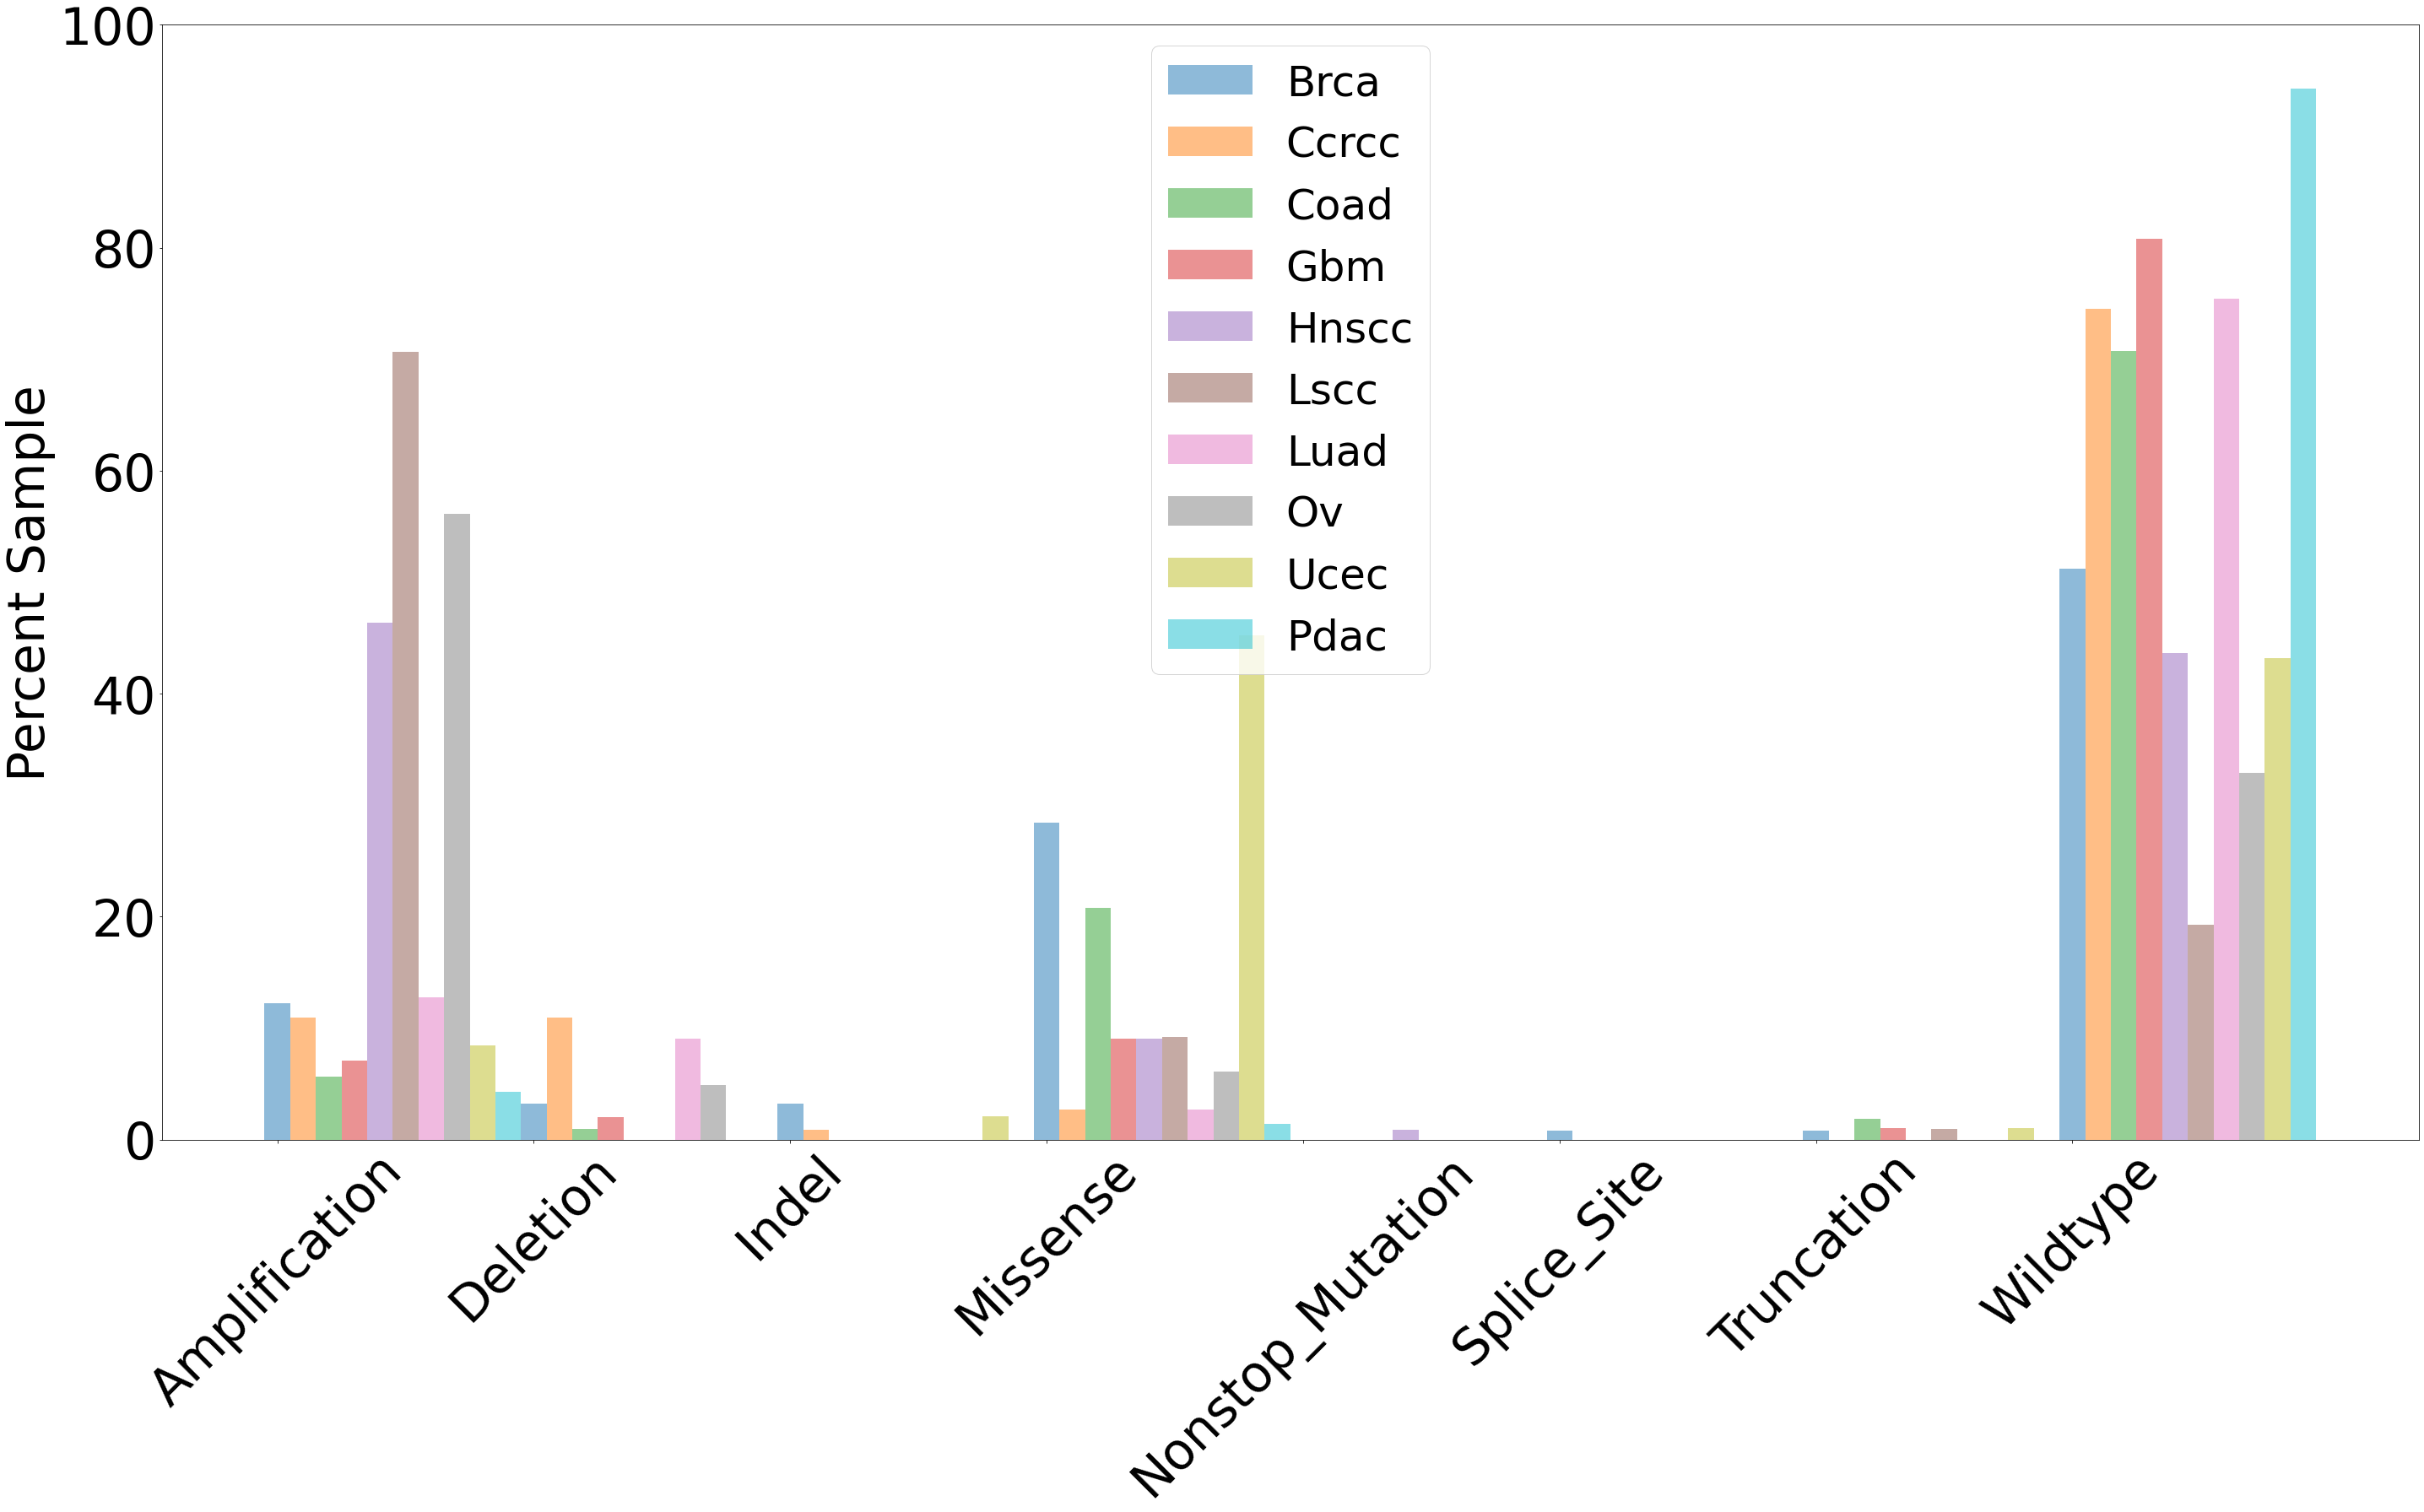

In [8]:
# Create graph showing the frequency of each mutation per cancer
plt.figure1_plot_mutations(dflist = [dataset[0] for dataset in datasets.values()], names_of_df = list(datasets.keys()), save_to_path = "Mutation_Frequency.png")

In [46]:
# Create a dictionary with the cancer name as the key, and a list of all
#    mutation types that have a frequency >=20% as the value.
# Used at the beginning of each step to determine which cancers will be included in the analysis
variants_to_analyze = {}
for name, dataset in datasets.items():
    mut_type_freq = dataset[0]["Mutation"].value_counts() / len(dataset[0])
    mut_type_freq = mut_type_freq.loc[mut_type_freq >= 0.2]
    variants_to_analyze[name] = set(mut_type_freq.index.tolist())
    variants_to_analyze[name].discard("Wildtype")
print(str(variants_to_analyze))


{'Brca': {'Missense', 'Wildtype'}, 'Ccrcc': {'Wildtype'}, 'Coad': {'Missense', 'Wildtype'}, 'Gbm': {'Wildtype'}, 'Hnscc': {'Amplification', 'Wildtype'}, 'Lscc': {'Amplification'}, 'Luad': {'Wildtype'}, 'Ov': {'Amplification', 'Wildtype'}, 'Ucec': {'Missense', 'Wildtype'}, 'Pdac': {'Wildtype'}}


#Step 3
Look at how proteomic expression differs between the mutated tumors and wildtype tumors

In [41]:
# Create a function that will analyze the protein cis effects for a given mutation type
def analyze_mutation(mutation_type, pval_only = True):
    output_string = ""
    for name, dataset in datasets.items():
        if mutation_type not in variants_to_analyze[name]: continue
        genotype_and_prot = pd.merge(dataset[0], dataset[1], left_index = True, right_index = True)
        mutation = genotype_and_prot.loc[genotype_and_prot["Mutation"] == mutation_type][target_gene].dropna()
        wildtype = genotype_and_prot.loc[genotype_and_prot["Mutation"] == "Wildtype"][target_gene].dropna()
        result = ttest_ind(mutation, wildtype)
        
        if not pval_only:
            output_string += f"""{name}\nNumber of {mutation_type}s = {len(mutation)}\nNumber of Wildtypes = {len(wildtype)}\n"""
        output_string += f"{name} {mutation_type} P-value = {result[1]}\n\n"
        
    return output_string    


In [37]:
print(str(variants_to_analyze))
# print(analyze_mutation("Missense", pval_only = False))

{'Brca': ['Wildtype', 'Missense'], 'Ccrcc': ['Wildtype'], 'Coad': ['Wildtype', 'Missense'], 'Gbm': ['Wildtype'], 'Hnscc': ['Amplification', 'Wildtype'], 'Lscc': ['Amplification'], 'Luad': ['Wildtype'], 'Ov': ['Amplification', 'Wildtype'], 'Ucec': ['Missense', 'Wildtype'], 'Pdac': ['Wildtype']}


In [44]:
for variant in ["Deletion", "Missense", "Amplification", "Truncation"]:
    print("----------" + variant.upper() + "-----------")
    print(analyze_mutation(variant, pval_only = False))
    print()

----------DELETION-----------


----------MISSENSE-----------
Brca
Number of Missenses = 34
Number of Wildtypes = 62
Brca Missense P-value = 0.4136071304038146

Coad
Number of Missenses = 19
Number of Wildtypes = 53
Coad Missense P-value = 0.3451708361382616

Ucec
Number of Missenses = 43
Number of Wildtypes = 41
Ucec Missense P-value = 0.1394571498900522



----------AMPLIFICATION-----------
Hnscc
Number of Amplifications = 51
Number of Wildtypes = 48
Hnscc Amplification P-value = 8.779608913150495e-08

Lscc
Number of Amplifications = 77
Number of Wildtypes = 21
Lscc Amplification P-value = 6.777352933247902e-06

Ov
Number of Amplifications = 46
Number of Wildtypes = 27
Ov Amplification P-value = 0.05106221295747373



----------TRUNCATION-----------




In [ ]:
#Cancers with more than 20% having deletions
deletion_sets = ["Brca","Ccrcc","Coad","Luad","Ov","Pdac"]

In [ ]:
target_dataset = datasets["Ccrcc"]
target_dataset[2]
# target_dataset[2].loc[target_dataset["Mutation"] == "Deletion"]

In [ ]:
genotype_and_prot = target_dataset[1].merge(target_dataset[2], left_index = True, right_index = True)
genotype_and_prot.loc[genotype_and_prot["Mutation"] == "Deletion"]

In [ ]:
with open("deletion_protein_data.txt", 'w') as outFile:
    for name, dataset in datasets.items():
        if name not in deletion_sets: continue
        outFile.write(name + '\n')
        genotype_and_prot = dataset[1].merge(dataset[2], left_index = True, right_index = True)
        deletions = genotype_and_prot.loc[genotype_and_prot["Mutation"] == "Deletion"][target_gene].dropna()
        wildtypes = genotype_and_prot.loc[genotype_and_prot["Mutation"] == "Wildtype_Tumor"][target_gene].dropna()
        outFile.write("len(deletions) = " + str(len(deletions)) + '\n')
        outFile.write("len(wildtypes) = " + str(len(wildtypes)) + '\n')
        result = ttest_ind(deletions, wildtypes)
        outFile.write(name + " deletion P-value: " + str(result[1]) + '\n')
        outFile.write("\n")
        

In [ ]:
#Cancers with more than 20% having Missense and Wildtype
missense_sets = ["Luad", "Pdac"]
for name, dataset in datasets.items():
    if name not in missense_sets: continue
    print(name)
    genotype_and_prot = dataset[1].merge(dataset[2], left_index = True, right_index = True)
    missenses = genotype_and_prot.loc[genotype_and_prot["Mutation"] == "Missense_Mutation"][target_gene].dropna()
    wildtypes = genotype_and_prot.loc[genotype_and_prot["Mutation"] == "Wildtype_Tumor"][target_gene].dropna()
    print("len(missenses) = " + str(len(missenses)))
    print("len(wildtypes) = " + str(len(wildtypes)))
    result = ttest_ind(deletions, wildtypes)
    print(name + " missense P-value: " + str(result[1]))
    print("\n")
    
# genotype_and_prot = datasets["Luad"][1].merge(datasets["Luad"][2], left_index = True, right_index = True)
# genotype_and_prot["Mutation"]
# genotype_and_prot.loc[genotype_and_prot["Mutation"] == "Missense_Mutation"]

In [ ]:
for thing in datasets["Brca"]:
    print(thing)